<a href="https://colab.research.google.com/github/usneek/Person-detection-using-forehead-images/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Extraction of Foreheads using SIFT**

Changing required verions

In [ ]:
!pip3 uninstall opencv-python
!pip3 install -U opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
y
     |████████████████████████████████| 30.6 MB 27 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Importing required libraries

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Feature Extraction:-
We have used SIFT libraray to create features in each of the image and used Flann Based matcher for matching

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

Making two arrays:-

1. Genuine- contains cosine similarities of same people's embeddings
2. Imposter- contains cosine similarities of differnet people's embeddings

In [ ]:
genuine=[]
imposter=[]
path=os.listdir('drive/MyDrive/DL Assignment/Images/')
for image in range(50):
  y='drive/MyDrive/DL Assignment/Images/'+path[image]
  listm=path[image].split('_')
  img=cv2.imread(y)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  keypoints_main, descriptors_main = sift.detectAndCompute(img,None)
  for image_secondary in range(50):
    y_sec='drive/MyDrive/DL Assignment/Images/'+path[image_secondary]
    img_sec=cv2.imread(y_sec)
    listi=path[image_secondary].split('_')
    if(listi[2]==listm[2]):
      continue
    img_sec = cv2.cvtColor(img_sec, cv2.COLOR_BGR2GRAY)
    keypoints_sec, descriptors_sec = sift.detectAndCompute(img_sec,None)
    matches = flann.knnMatch(np.asarray(descriptors_main,np.float32),np.asarray(descriptors_sec,np.float32), k=2)
    number_keypoints = 0
    if len(keypoints_main) <= len(keypoints_sec):
        number_keypoints = len(keypoints_main)
    else:
        number_keypoints = len(keypoints_sec)
    good = []
    for m,n in matches:
        if m.distance < 0.8*n.distance:
          good.append([m])
    score = len(good) / number_keypoints
    if(listi[0]==listm[0]):
      genuine.append(score)
    else :
      imposter.append(score)

Plotting 'Genuine' and 'Imposter' histograms Histograms have been normalised i.e instead of actual numbers, percentage has been considered.

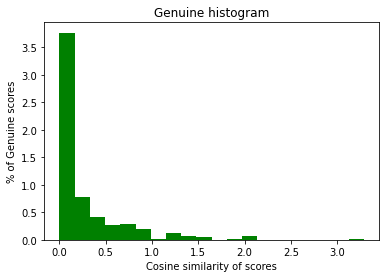

In [ ]:
import matplotlib.pyplot as plt
a = np.array(genuine)
plt.hist(a, bins =int(100/5),density=True,color='Green')
plt.ylabel("% of Genuine scores")
plt.xlabel("Cosine similarity of scores")
plt.title('Genuine histogram')
plt.show()

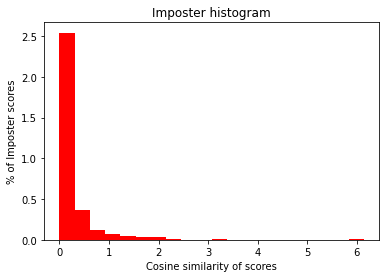

In [ ]:
import matplotlib.pyplot as plt
a = np.array(imposter)
plt.hist(a, bins =int(100/5),density=True,color='Red')
plt.ylabel("% of Imposter scores")
plt.xlabel("Cosine similarity of scores")
plt.title('Imposter histogram')
plt.show()

Plotting ROC curve between false accetance and false rejection rate by varying threshold

In [ ]:
def FAR(threshold):
  count=0;
  for i in range(len(imposter)):
    if(imposter[i]>threshold):
      count+=1;
  count=count/len(imposter)*100
  return count/(200)

def FRR(threshold):
  count=0;
  for i in range(len(genuine)):
    if(genuine[i]<threshold):
      count+=1;
  count=count/len(genuine)*100
  return count/(200)

In [ ]:
far=[]
frr=[]
threshold=[]
for i in range(100):
  threshold.append(i/100)
  far.append(FAR(i/100));
  frr.append(FRR(i/100));

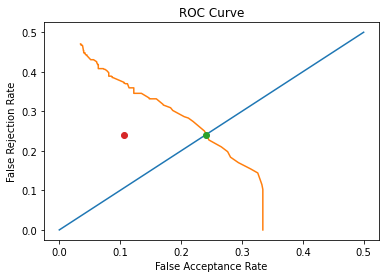

The equal acceptance rate is  24.133963178294575 %
The corresponding threshold is 0.10616279069767443


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
a=[0,0.5]
b=[0,0.5]
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.title('ROC Curve')
plt.plot(a, b)     #plotting y=x for FAR=FRR
plt.plot(far, frr)
first_line = LineString(np.column_stack((far, frr)))
second_line = LineString(np.column_stack((a, b)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')
x, y = intersection.xy

############################################### finding the corresponding threshold

c=[0,0.5,1]
d=[x,x,x]
first_line = LineString(np.column_stack((threshold, far)))
second_line = LineString(np.column_stack((c, d)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')
plt.show()
u, v = intersection.xy
print("The equal acceptance rate is ",x[0]*100,"%")
print("The corresponding threshold is",u[0])

In [ ]:
def CRR(threshold):
  count=0
  count2=0
  for i in range(len(genuine)):
    if(genuine[i]>threshold):
      count+=1
  count=count/len(genuine)*100
  for i in range(len(imposter)):
    if(imposter[i]<threshold):
      count2+=1;
  count2=count2/len(imposter)*100
  return (count+count2)/200

def accuracy(EER):
  return 100-EER      #FAR=FRR=EER hence accuracy changes to this formula

print("The correct recognition rate is ",CRR(u[0])*100,"%")
print("The accuracy is ",accuracy(x[0]*100),"%")

The correct recognition rate is  51.63194444444444 %
The accuracy is  75.86603682170542 %
